

# Hypothsis: 

women tend to work harder than men in university (field of science) in order to have a place in the men dominated field.




After university, women tend to work better than men.

We load a file of dataset  about the acedamic performance of students in university.

All the programme of study:

BCH - Biochemistry

BLD - Building technology

CEN - Computer Engineering

CHE - Chemical Engineering

CHM - Industrial Chemistry

CIS - Computer Science

CVE - Civil Engineering

EEE - Electrical and Electronics Engineering

ICE - Information and Communication Engineering

MAT - Mathematics

MCB - Microbiology

MCE - Mechanical Engineering

MIS - Management and Information System

PET - Petroleum Engineering

PHYE - Industrial Physics-Electronics and IT Applications

PHYG - Industrial Physics-Applied Geophysics

PHYR - Industrial Physics-Renewable Energy

In [1]:
import pandas as pd

score_data = pd.read_csv("academic_performance_dataset_V2.csv")

score_data.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


Since there are 17 different kinds of study Program, in order to simplize the analysis, we classify them into the following categories:

Biology: BCH, MCB

Math: MAT

Physics: PHYG, PHYR, PHYE

Chemistry: CHE, CHM, PET

Technology: BLD, MIS, EEE

Computer_science: CEN, CIS, ICE

Mechanics: CVE, MCE

In [2]:
def reclassify_program(old_code):
    if old_code == "BCH" or old_code =="MCB":
        return "biology"
    if old_code == "MAT":
        return "math"
    if old_code == "PHYG" or old_code =="PHYR" or old_code =="PHYE":
        return "physcis"
    if old_code == "CHE" or old_code == "CHM" or old_code =="PET":
        return "chemistry"
    if old_code == "BLD" or old_code == "MIS":
        return "tech"
    if old_code == "CEN" or old_code =="CIS" or old_code =="ICE" or old_code =="EEE":
        return "computer_science"
    if old_code == "CVE" or old_code =="MCE":
        return "mechanics"

score_data["Program"] = score_data["Prog Code"].apply(reclassify_program)    

score_data.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Program
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,computer_science
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,biology
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,biology
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,biology
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,biology


Let's count the number of males and females in general.

In [3]:
score_data.groupby("Gender")["Gender"].count()

Gender
Female    1093
Male      1953
Name: Gender, dtype: int64

In [4]:
nb_female = 1093
nb_male = 1953

Let's count the number of students in every program.

In [5]:
score_data.groupby("Program")["Program"].count()


Program
biology              312
chemistry            531
computer_science    1242
math                  61
mechanics            351
physcis              145
tech                 404
Name: Program, dtype: int64

Let's count the number of students graduating from school each year.

In [6]:
score_data.groupby("YoG")["YoG"].count()

YoG
2010    470
2011    471
2012    714
2013    811
2014    580
Name: YoG, dtype: int64

To have an overall view, we compare the GPA (At the end of university study) of females and males.

In [7]:
score_data.groupby("Gender")["SGPA"].mean().reset_index()

,Gender,SGPA
0,Female,3.139222
1,Male,3.108689


Text(0.5, 1.0, 'Average GPA of male and female')

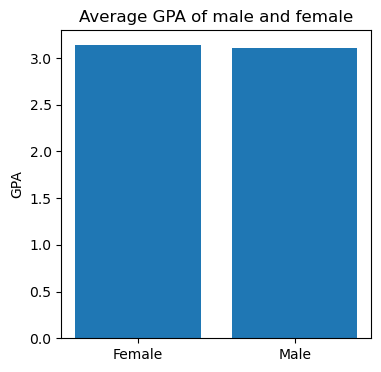

In [8]:
import matplotlib.pyplot as plt

a = score_data.groupby("Gender")["SGPA"].mean().reset_index()
average = a["SGPA"].to_list()

plt.figure(figsize=(4,4))
plt.bar(a["Gender"].tolist(),average)
plt.ylabel("GPA")
plt.title("Average GPA of male and female")


We find that females do slightly better than males in general.

Now let's see what happens in each year.

In [9]:
score_data.groupby(["YoG","Gender"])["SGPA"].mean()

YoG   Gender
2010  Female    3.298980
      Male      3.246440
2011  Female    3.132488
      Male      3.032970
2012  Female    3.179423
      Male      3.148040
2013  Female    3.076324
      Male      3.058071
2014  Female    3.065311
      Male      3.068437
Name: SGPA, dtype: float64

In [10]:
average_score_every_year = score_data.groupby(["YoG","Gender"])["SGPA"].mean().reset_index()
average_female_score_every_year=average_score_every_year[average_score_every_year["Gender"]=="Female"]
average_male_score_every_year=average_score_every_year[average_score_every_year["Gender"]=="Male"]

Let's visulaize it!

Text(0.5, 1.0, 'The average GPA of male and female change with the year graduating from university')

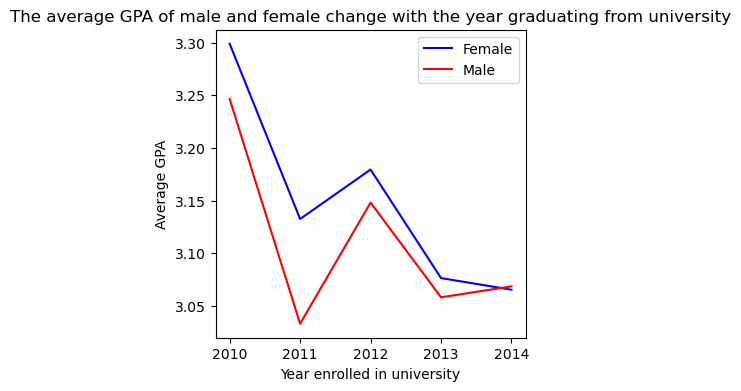

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4,4))
plt.plot( average_female_score_every_year["YoG"], average_female_score_every_year["SGPA"],color = "b",label = "Female")
plt.plot(average_male_score_every_year["YoG"], average_male_score_every_year["SGPA"],color = "r",label = "Male")
plt.xlabel("Year enrolled in university")
plt.ylabel("Average GPA")
plt.legend()
plt.title("The average GPA of male and female change with the year graduating from university")


From the graph, we can see that every year women are slightly better then men or do equally well.

Now let's see the distribution of GPA.

Text(0, 0.5, 'Number of students')

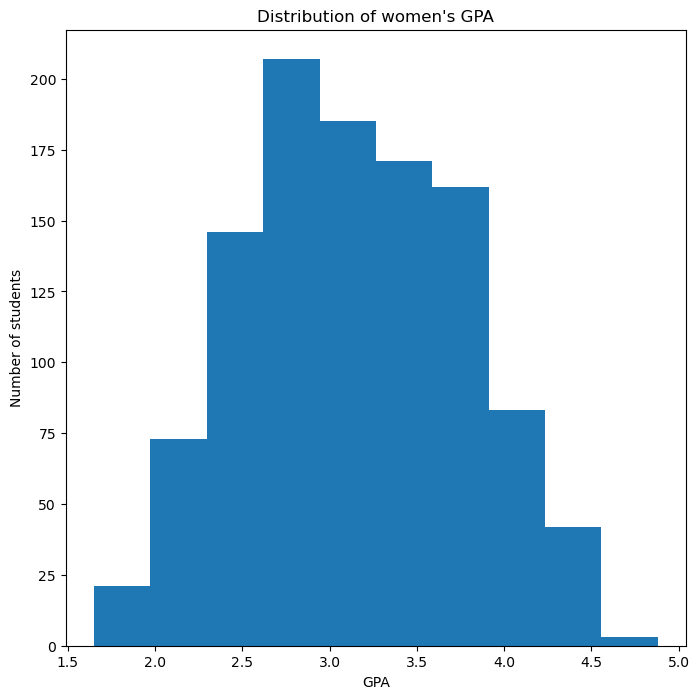

In [12]:




plt.figure(figsize=(8,8))
plt.title("Distribution of women's GPA")
plt.hist(score_data[score_data["Gender"]=="Female"]["SGPA"])
plt.xlabel("GPA")
plt.ylabel("Number of students")

Text(0, 0.5, 'Number of students')

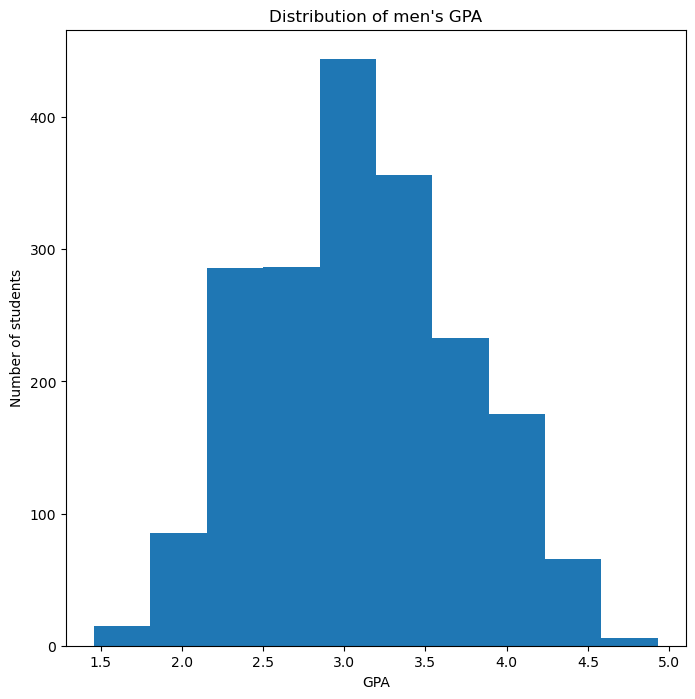

In [13]:
plt.figure(figsize=(8,8))
plt.title("Distribution of men's GPA")
plt.hist(score_data[score_data["Gender"]=="Male"]["SGPA"])
plt.xlabel("GPA")
plt.ylabel("Number of students")

Text(0.5, 1.0, 'percentage of students(female and male) with different GPA')

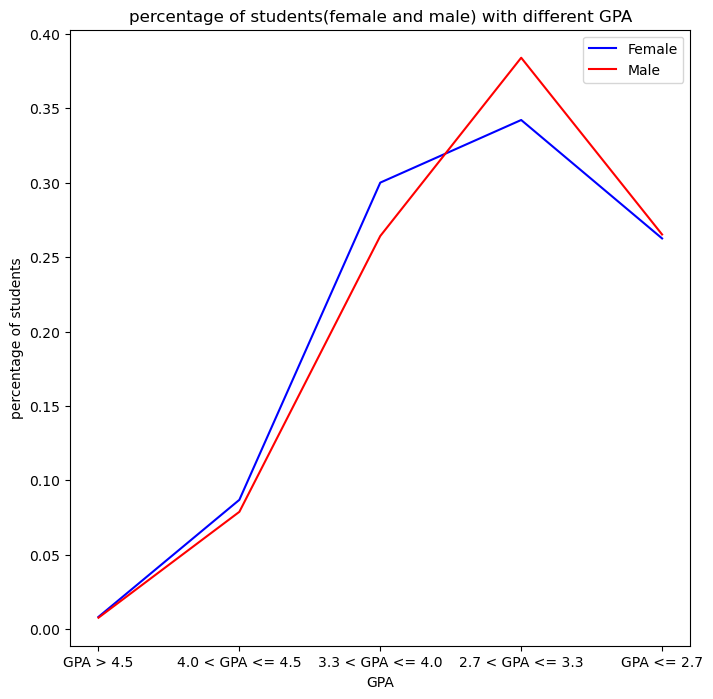

In [14]:
def classify_GPA(gpa):
    if gpa > 4.5: return "GPA > 4.5"
    if gpa <= 4.5 and gpa > 4.0: return "4.0 < GPA <= 4.5" 
    if gpa <= 4.0 and gpa > 3.3: return "3.3 < GPA <= 4.0"
    if gpa <= 3.3 and gpa > 2.7: return "2.7 < GPA <= 3.3"
    if gpa <= 2.7: return "GPA <= 2.7"
   

score_data["SGPA_separate"] = score_data["SGPA"].apply(classify_GPA)


score_data_female = score_data[score_data["Gender"]=="Female"].groupby("SGPA_separate").count().reset_index()

score_data_male = score_data[score_data["Gender"]=="Male"].groupby("SGPA_separate").count().reset_index()

order = ["GPA > 4.5","4.0 < GPA <= 4.5","3.3 < GPA <= 4.0","2.7 < GPA <= 3.3","GPA <= 2.7"]
score_data_female["SGPA_separate"] = pd.Categorical(score_data_female["SGPA_separate"], categories=order, ordered=True)
score_data_male["SGPA_separate"] = pd.Categorical(score_data_male["SGPA_separate"], categories=order, ordered=True)


score_data_female = score_data_female.sort_values("SGPA_separate")
score_data_male = score_data_male.sort_values("SGPA_separate")

plt.figure(figsize=(8,8))
plt.plot(score_data_female["SGPA_separate"], score_data_female["ID No"]/nb_female,color = "b",label = "Female")
plt.plot(score_data_male["SGPA_separate"], score_data_male["ID No"]/nb_male,color = "r",label = "Male")
plt.xlabel("GPA")
plt.ylabel("percentage of students")
plt.legend()
plt.title("percentage of students(female and male) with different GPA")

From the graph we can see that there's not so much difference on the GPA distribution between men and women.

Women are slightly better than men.


Now let's see how the distribution change over the years.

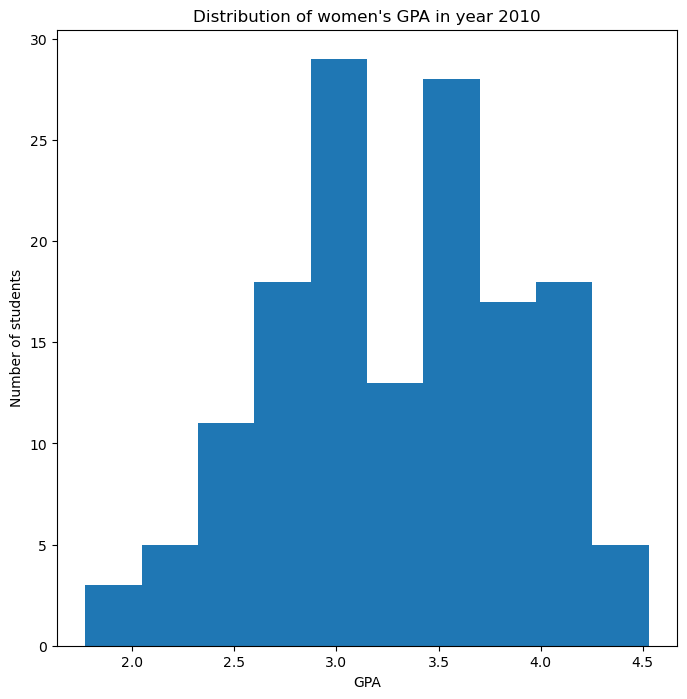

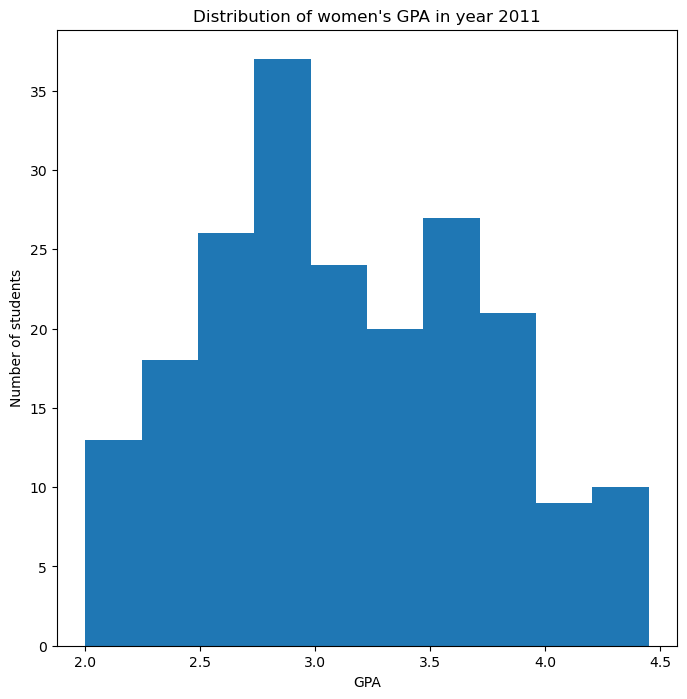

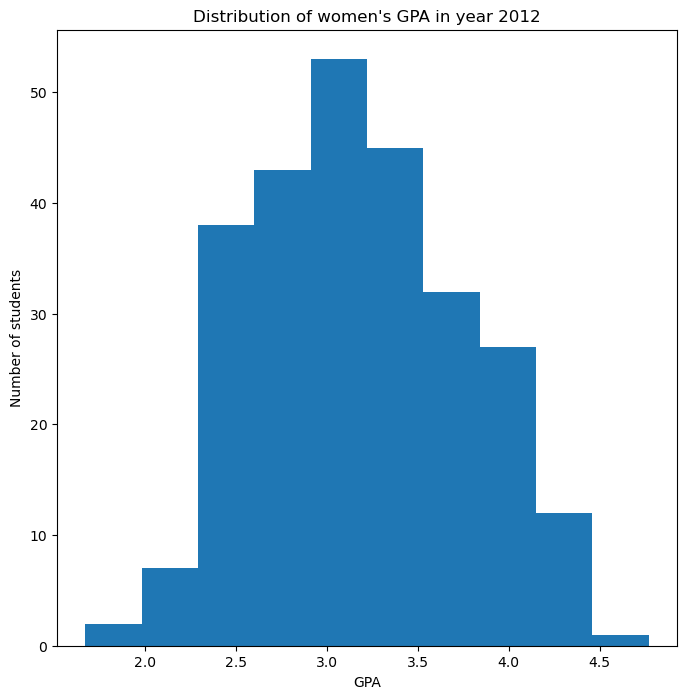

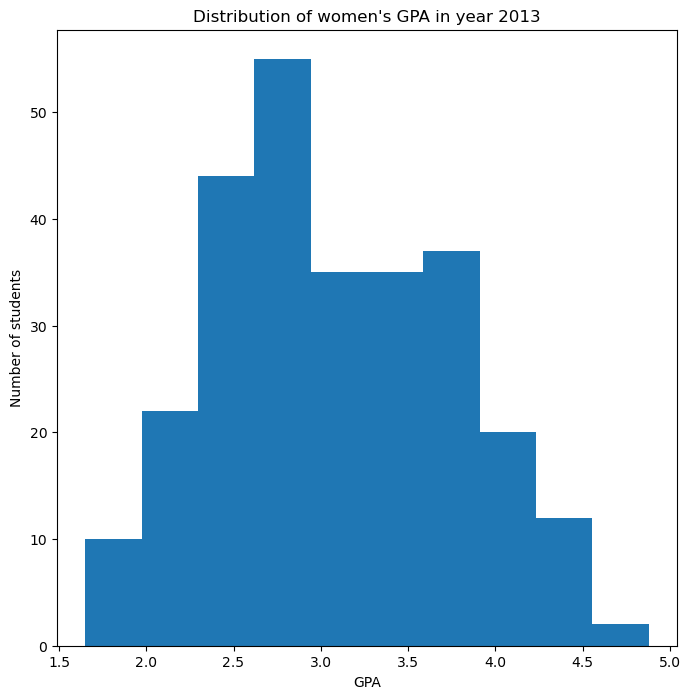

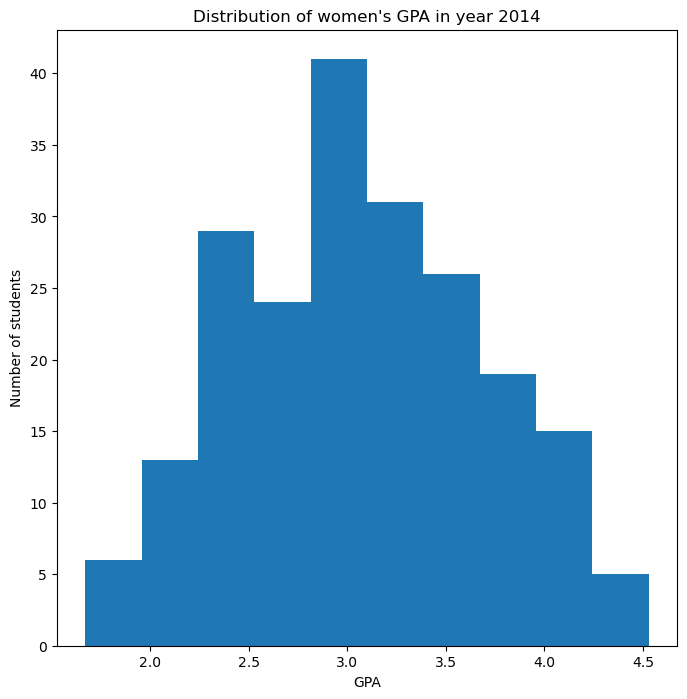

In [15]:
list_of_years = sorted(score_data["YoG"].unique())
for x in list_of_years:
    plt.figure(figsize=(8,8))
    year = str(x)
    plt.title("Distribution of women's GPA in year " + year)
    plt.hist(score_data[(score_data["Gender"]=="Female") & (score_data["YoG"] == x)]["SGPA"])
    plt.xlabel("GPA")
    plt.ylabel("Number of students")
    plt.show()

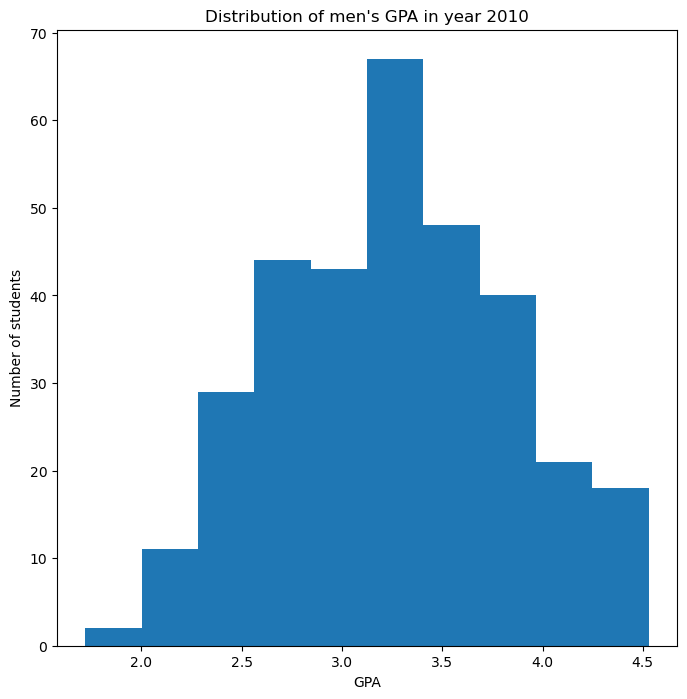

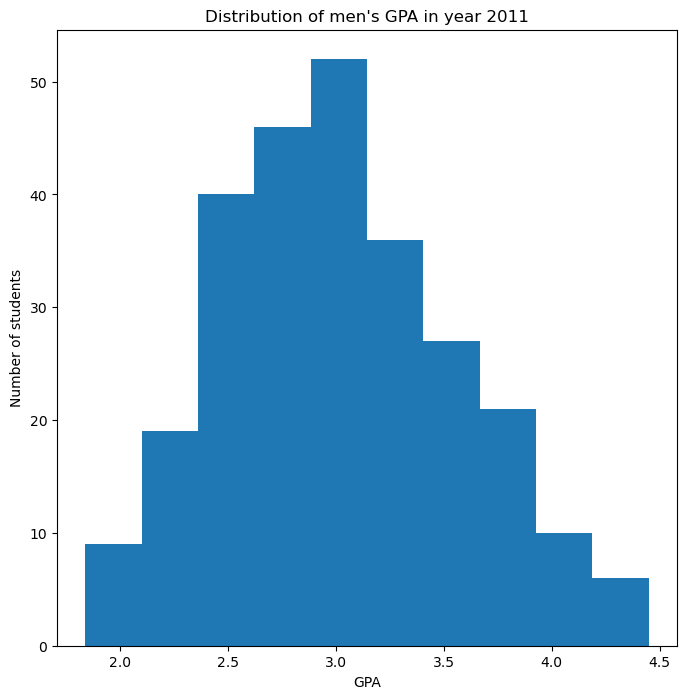

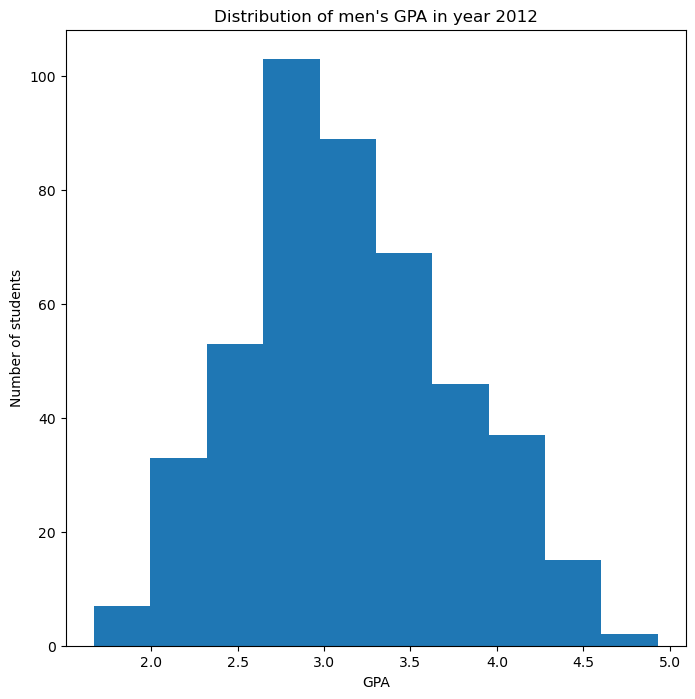

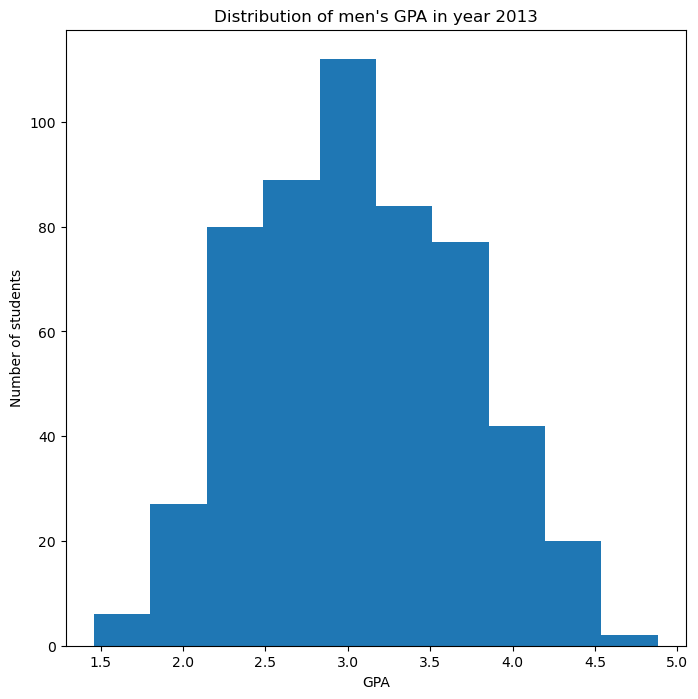

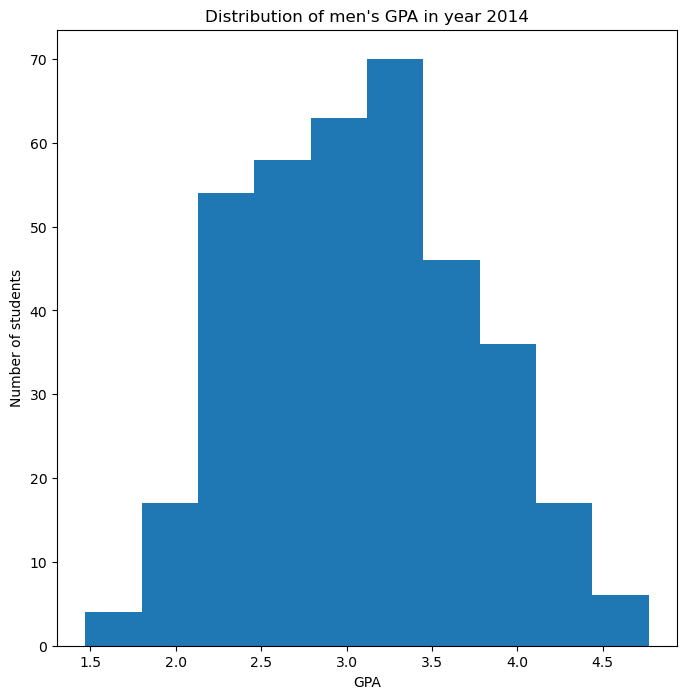

In [16]:
list_of_years = sorted(score_data["YoG"].unique())
for x in list_of_years:
    plt.figure(figsize=(8,8))
    year = str(x)
    plt.title("Distribution of men's GPA in year " + year)
    plt.hist(score_data[(score_data["Gender"]=="Male") & (score_data["YoG"] == x)]["SGPA"])
    plt.xlabel("GPA")
    plt.ylabel("Number of students")
    plt.show()

In [17]:
score_data.groupby(["YoG","Gender"])["ID No"].count().reset_index()

,YoG,Gender,ID No
0,2010,Female,147
1,2010,Male,323
2,2011,Female,205
3,2011,Male,266
4,2012,Female,260
5,2012,Male,454
6,2013,Female,272
7,2013,Male,539
8,2014,Female,209
9,2014,Male,371


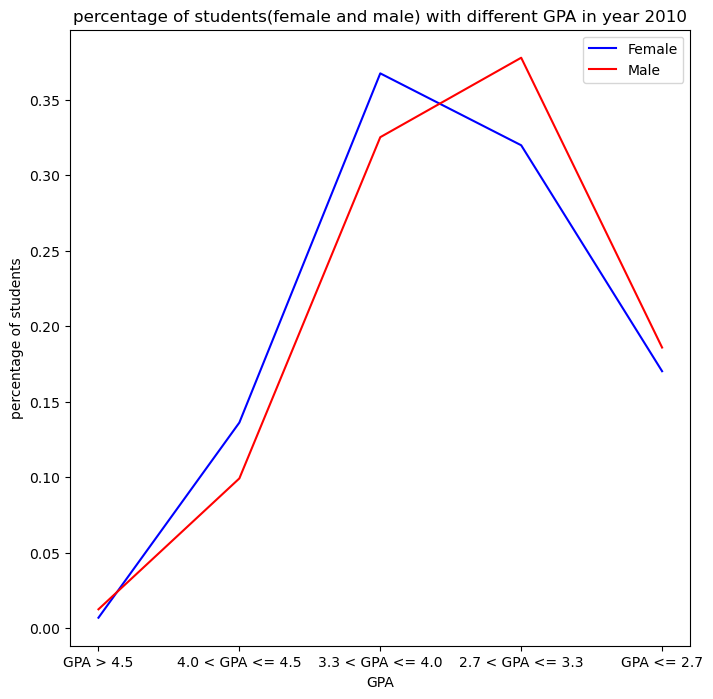

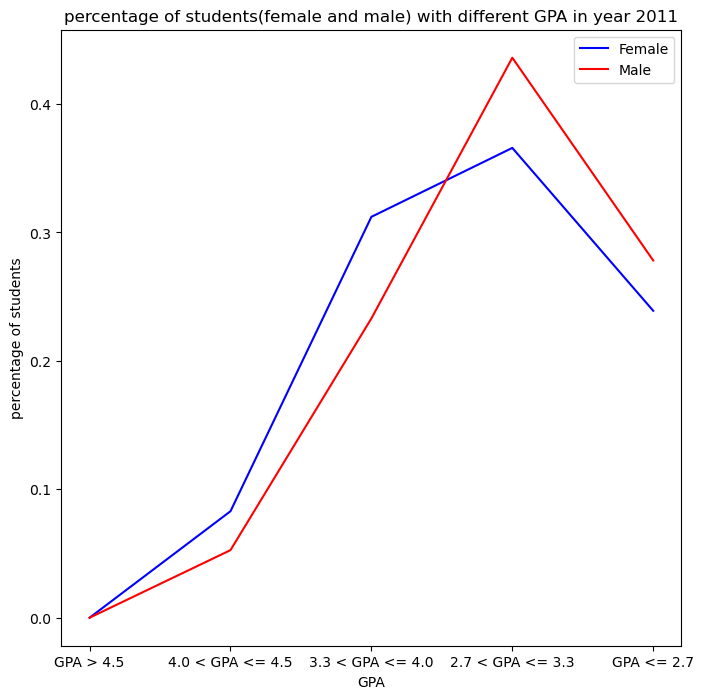

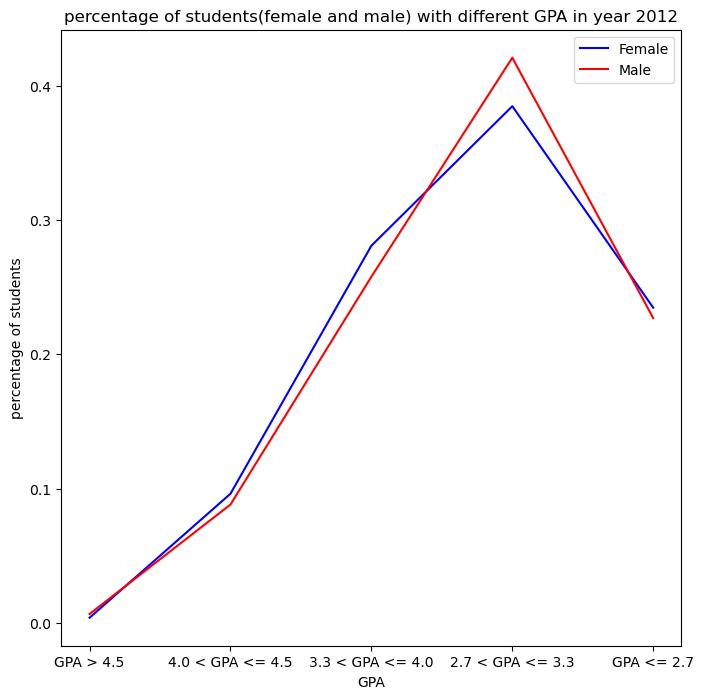

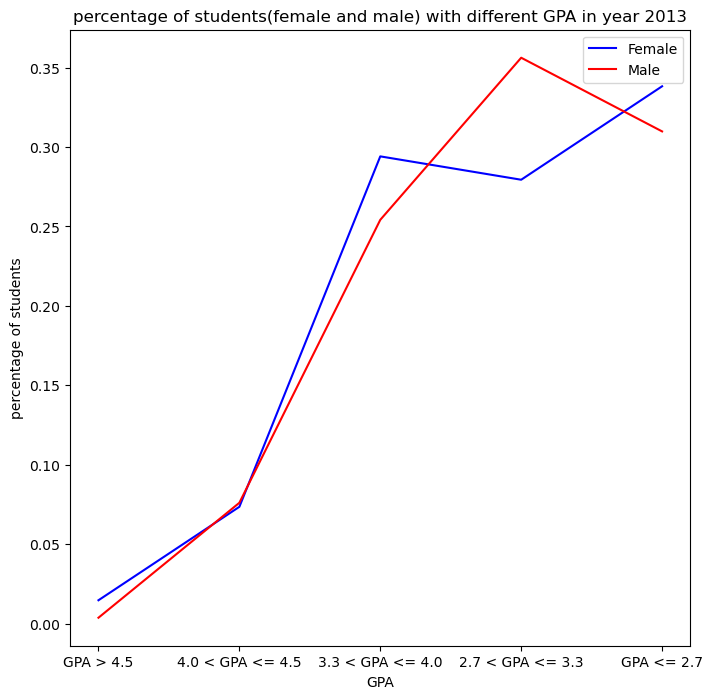

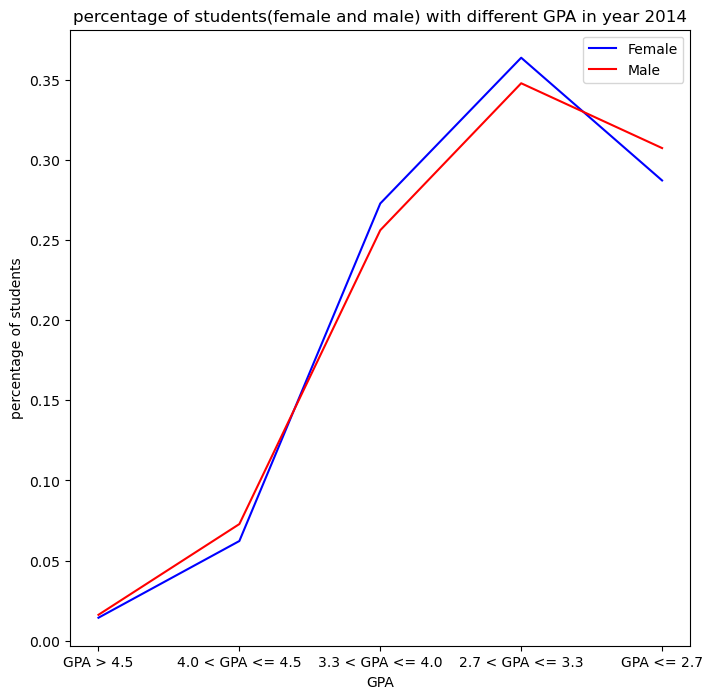

In [18]:
b = score_data.groupby(["YoG","Gender"])["ID No"].count().reset_index()

for x in list_of_years:

    year = str(x)
    score_data_female = score_data[(score_data["Gender"]=="Female") & (score_data["YoG"] == x)].groupby("SGPA_separate").count().reset_index()
    score_data_male = score_data[(score_data["Gender"]=="Male") & (score_data["YoG"] == x)].groupby("SGPA_separate").count().reset_index()

    order = ["GPA > 4.5","4.0 < GPA <= 4.5","3.3 < GPA <= 4.0","2.7 < GPA <= 3.3","GPA <= 2.7"]
    score_data_female = score_data_female.set_index("SGPA_separate").reindex(order, fill_value=0).reset_index()
    score_data_male = score_data_male.set_index("SGPA_separate").reindex(order, fill_value=0).reset_index()

    
    nb_female_1 = b.loc[(b["YoG"] == x) & (b["Gender"] == "Female"), "ID No"].values[0]
    nb_male_1 = b.loc[(b["YoG"] == x) & (b["Gender"] == "Male"), "ID No"].values[0]
    
    plt.figure(figsize=(8,8))
    plt.plot(score_data_female["SGPA_separate"], score_data_female["ID No"]/nb_female_1,color = "b",label = "Female")
    plt.plot(score_data_male["SGPA_separate"], score_data_male["ID No"]/nb_male_1,color = "r",label = "Male")
    plt.xlabel("GPA")
    plt.ylabel("percentage of students")
    plt.legend()
    plt.title("percentage of students(female and male) with different GPA in year " + year )

Now let's move to the different study program.

First let's count the number of females and males in every study program.

In [19]:
score_data.groupby(["Program","Gender"])["Gender"].count()

Program           Gender
biology           Female    243
                  Male       69
chemistry         Female    210
                  Male      321
computer_science  Female    368
                  Male      874
math              Female     27
                  Male       34
mechanics         Female     40
                  Male      311
physcis           Female     24
                  Male      121
tech              Female    181
                  Male      223
Name: Gender, dtype: int64

In [20]:
score_data_biology = score_data[score_data["Program"]=="biology"]
score_data_chemistry = score_data[score_data["Program"]=="chemistry"]
score_data_computer_science = score_data[score_data["Program"]=="computer_science"]
score_data_math = score_data[score_data["Program"]=="math"]
score_data_mechanics = score_data[score_data["Program"]=="mechanics"]
score_data_physics = score_data[score_data["Program"]=="physcis"]
score_data_tech = score_data[score_data["Program"]=="tech"]

# quoi

Women makes more progress than men in university (compared with high school).